In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

titanic = pd.read_csv('/content/Titanic-Dataset.csv.xls')


In [ ]:
print(titanic.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(f"Dataset shape: {titanic.shape}")

Dataset shape: (891, 12)


In [ ]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(titanic.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
titanic = titanic.drop(columns=['Cabin', 'Name', 'Ticket'])

In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic.dropna(subset=['Fare'], inplace=True)

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

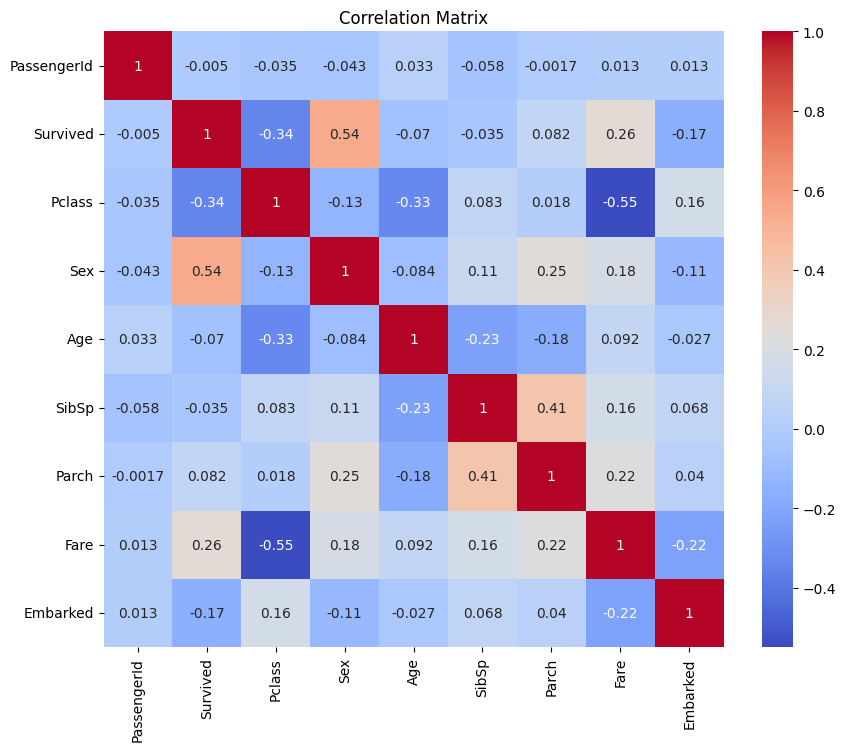

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

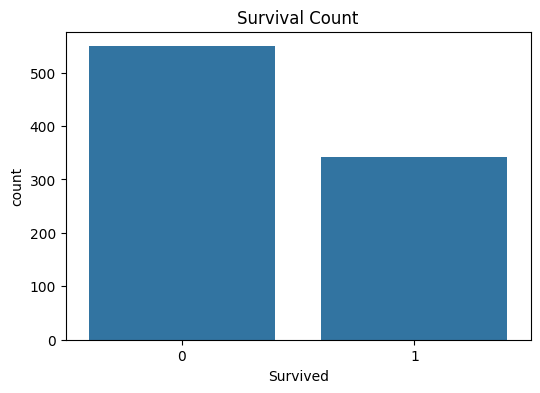

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

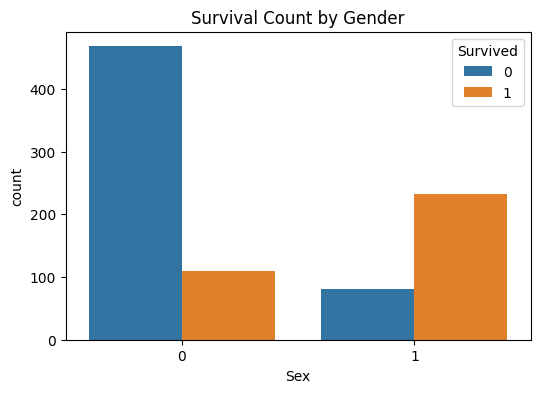

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.show()


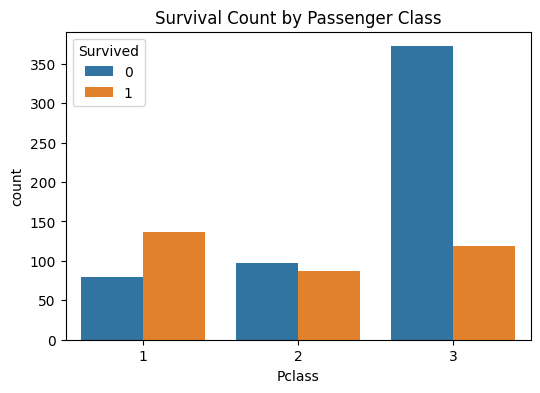

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.show()

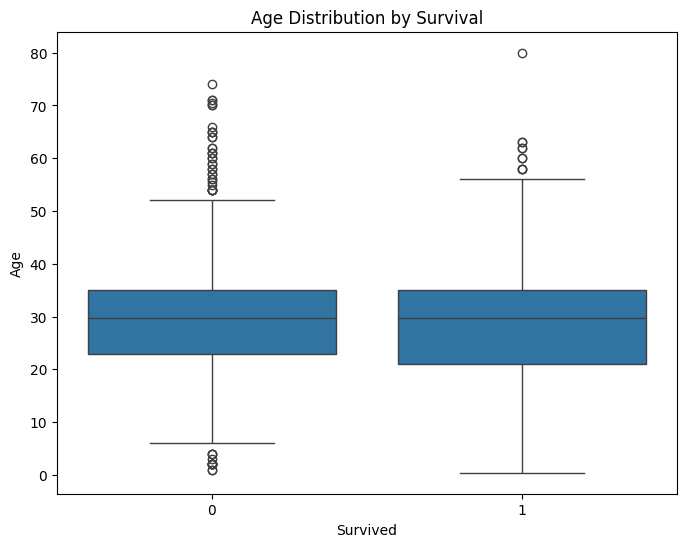

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution by Survival')
plt.show()

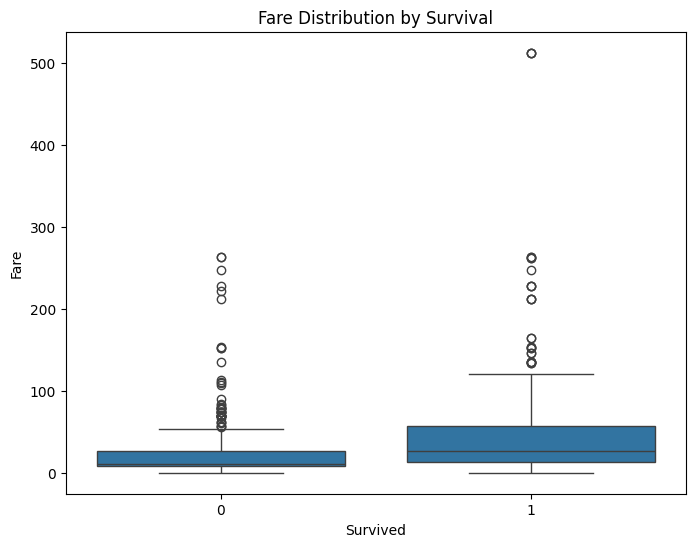

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare Distribution by Survival')
plt.show()


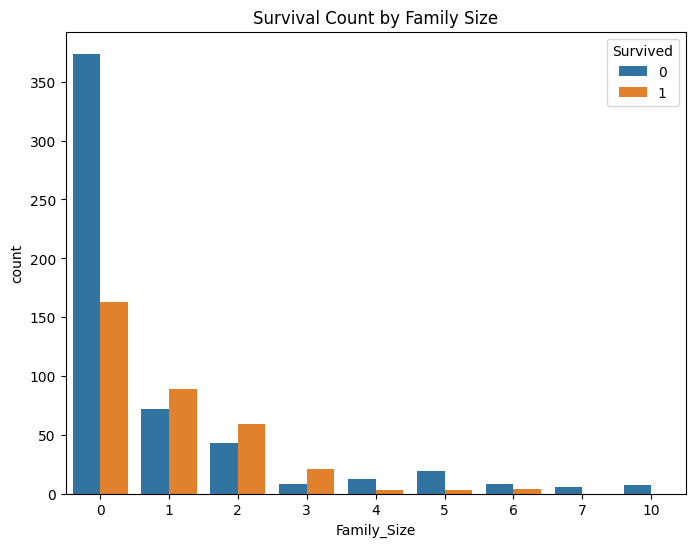

In [ ]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_Size', hue='Survived', data=titanic)
plt.title('Survival Count by Family Size')
plt.show()


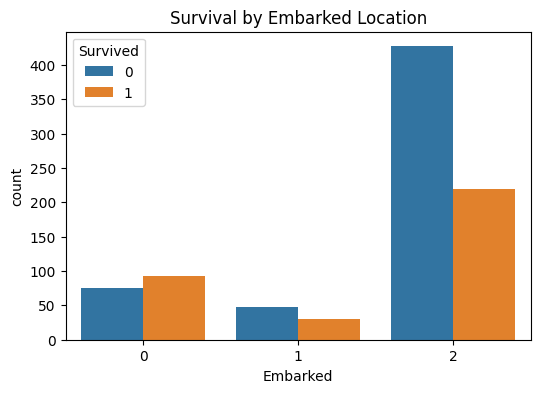

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Survival by Embarked Location')
plt.show()



MODELLING

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 0.8268
Precision: 0.8116
Recall: 0.7568
AUC-ROC: 0.8957

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



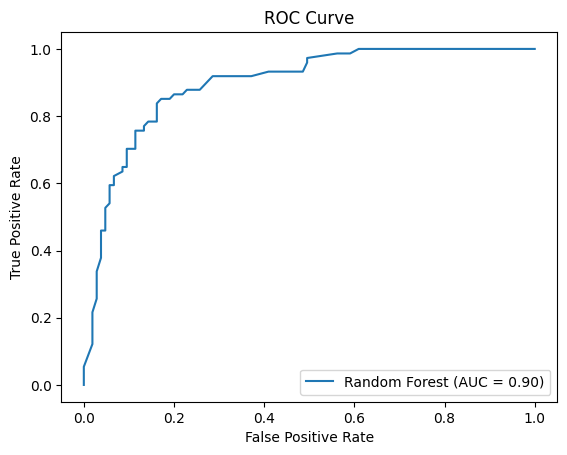

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

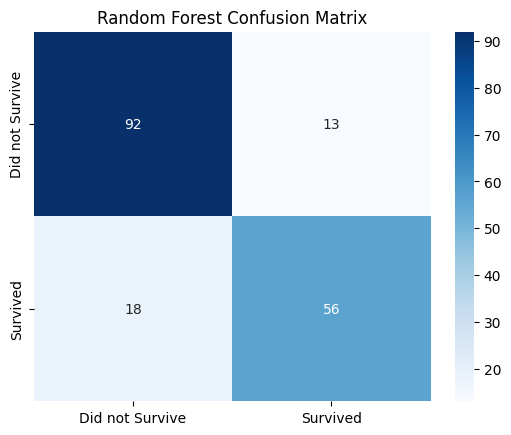

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [ ]:
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"AUC-ROC: {roc_auc_log:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
AUC-ROC: 0.8757

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



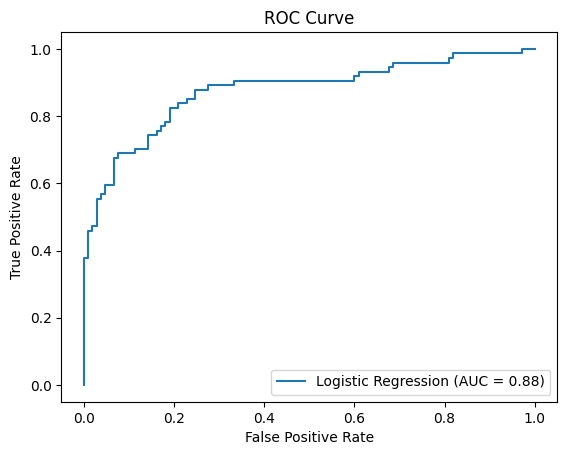

In [ ]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


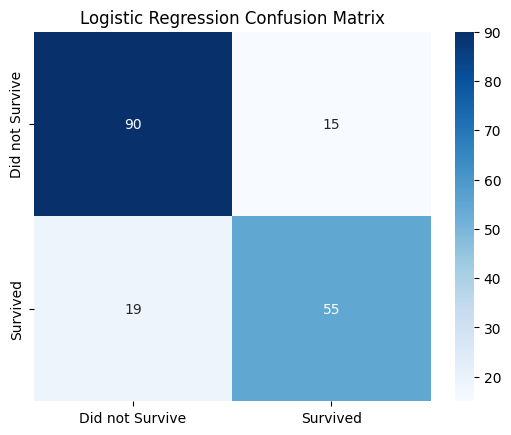

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"Best Parameters from Grid Search: {grid_search_rf.best_params_}")


Best Parameters from Grid Search: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)




Final Random Forest Classifier Performance (Tuned):
Accuracy: 0.8101
Precision: 0.8125
Recall: 0.7027
AUC-ROC: 0.8947


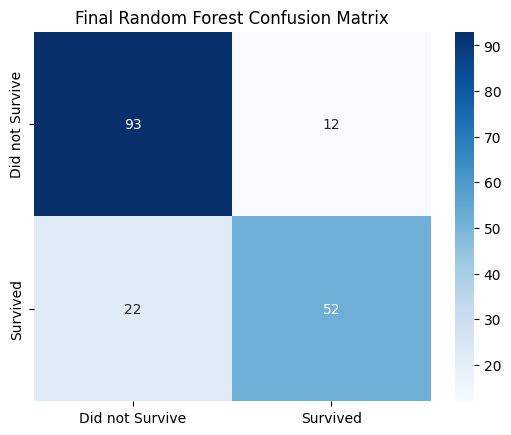

In [ ]:
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f"Final Random Forest Classifier Performance (Tuned):")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"AUC-ROC: {roc_auc_best_rf:.4f}")

# Confusion Matrix for Final Random Forest Model
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.title('Final Random Forest Confusion Matrix')
plt.show()